In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
import numpy as np
from src.gameSimulation.GameUr import GameUr, Player, Dice, GameSettings
import src.gameSimulation.Strategies as Strategies
import src.gameSimulation.Multirun as Multirun
import gameBoard as gb


# %config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap

mplstyle.use('fast')
mplstyle.use('default')
# mpl.rcParams['figure.figsize'] = [20, 10]

colors = ["lightgreen", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)






In [64]:
rs = Strategies.RandomStrategy()
mfs = Strategies.MoveFirstStrategy()
mls = Strategies.MoveLastStrategy()
p0 = Player(0,4,mls)
p1 = Player(1, 4, mfs)
# p2 = Player(2, 4, mfs)
# p3 = Player(3, 4, rs)
d = Dice.MultiD2Dice(4)
# d = Dice.FunkyD2()
# gs = GameSettings([p0,p1],d,4,8,2,[8],[4,8,13],exactFinish=False)
gs = GameSettings([p0,p1],d,4,8,2,[8],[4,8,13])


In [65]:
g = GameUr(gs)
g.getStonesHistory()
g.run()

KeyboardInterrupt: 

In [ ]:
h = Multirun.multirun(10000,gs)


10
101
1010
start pool
finish pool


In [ ]:
gl = [x["gameLength"] for x in h]



In [ ]:
gl = [x["gameLength"] for x in h]
gl_stacked = [(i,gl.count(i)) for i in range(np.min(gl),np.max(gl)+1)]

gl_stacked
np.average(gl)
# np.min(gl)
# np.max(gl)


34.82970297029703

<BarContainer object of 39 artists>

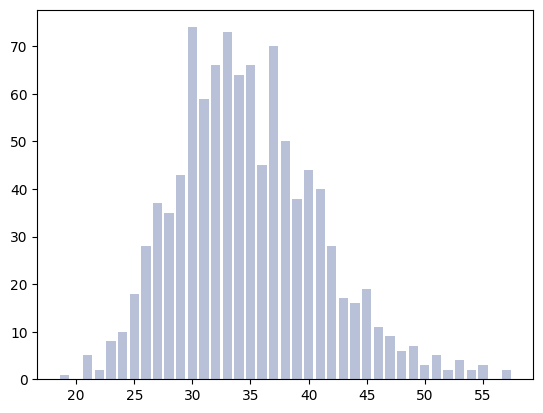

In [ ]:
plt.bar([x for x, _ in gl_stacked], [
        y for _, y in gl_stacked], color=(0.1, 0.2, 0.5, 0.3))


In [ ]:
{"min":np.min(gl),"median":np.median(gl),"max":np.max(gl)}

{'min': 19, 'median': 34.0, 'max': 57}

In [ ]:
interestingGames = {"min": gl.index(np.min(gl)), "median": gl.index(
    np.median(gl)), "max": gl.index(np.max(gl))}
interestingGames


{'min': 346, 'median': 3, 'max': 372}

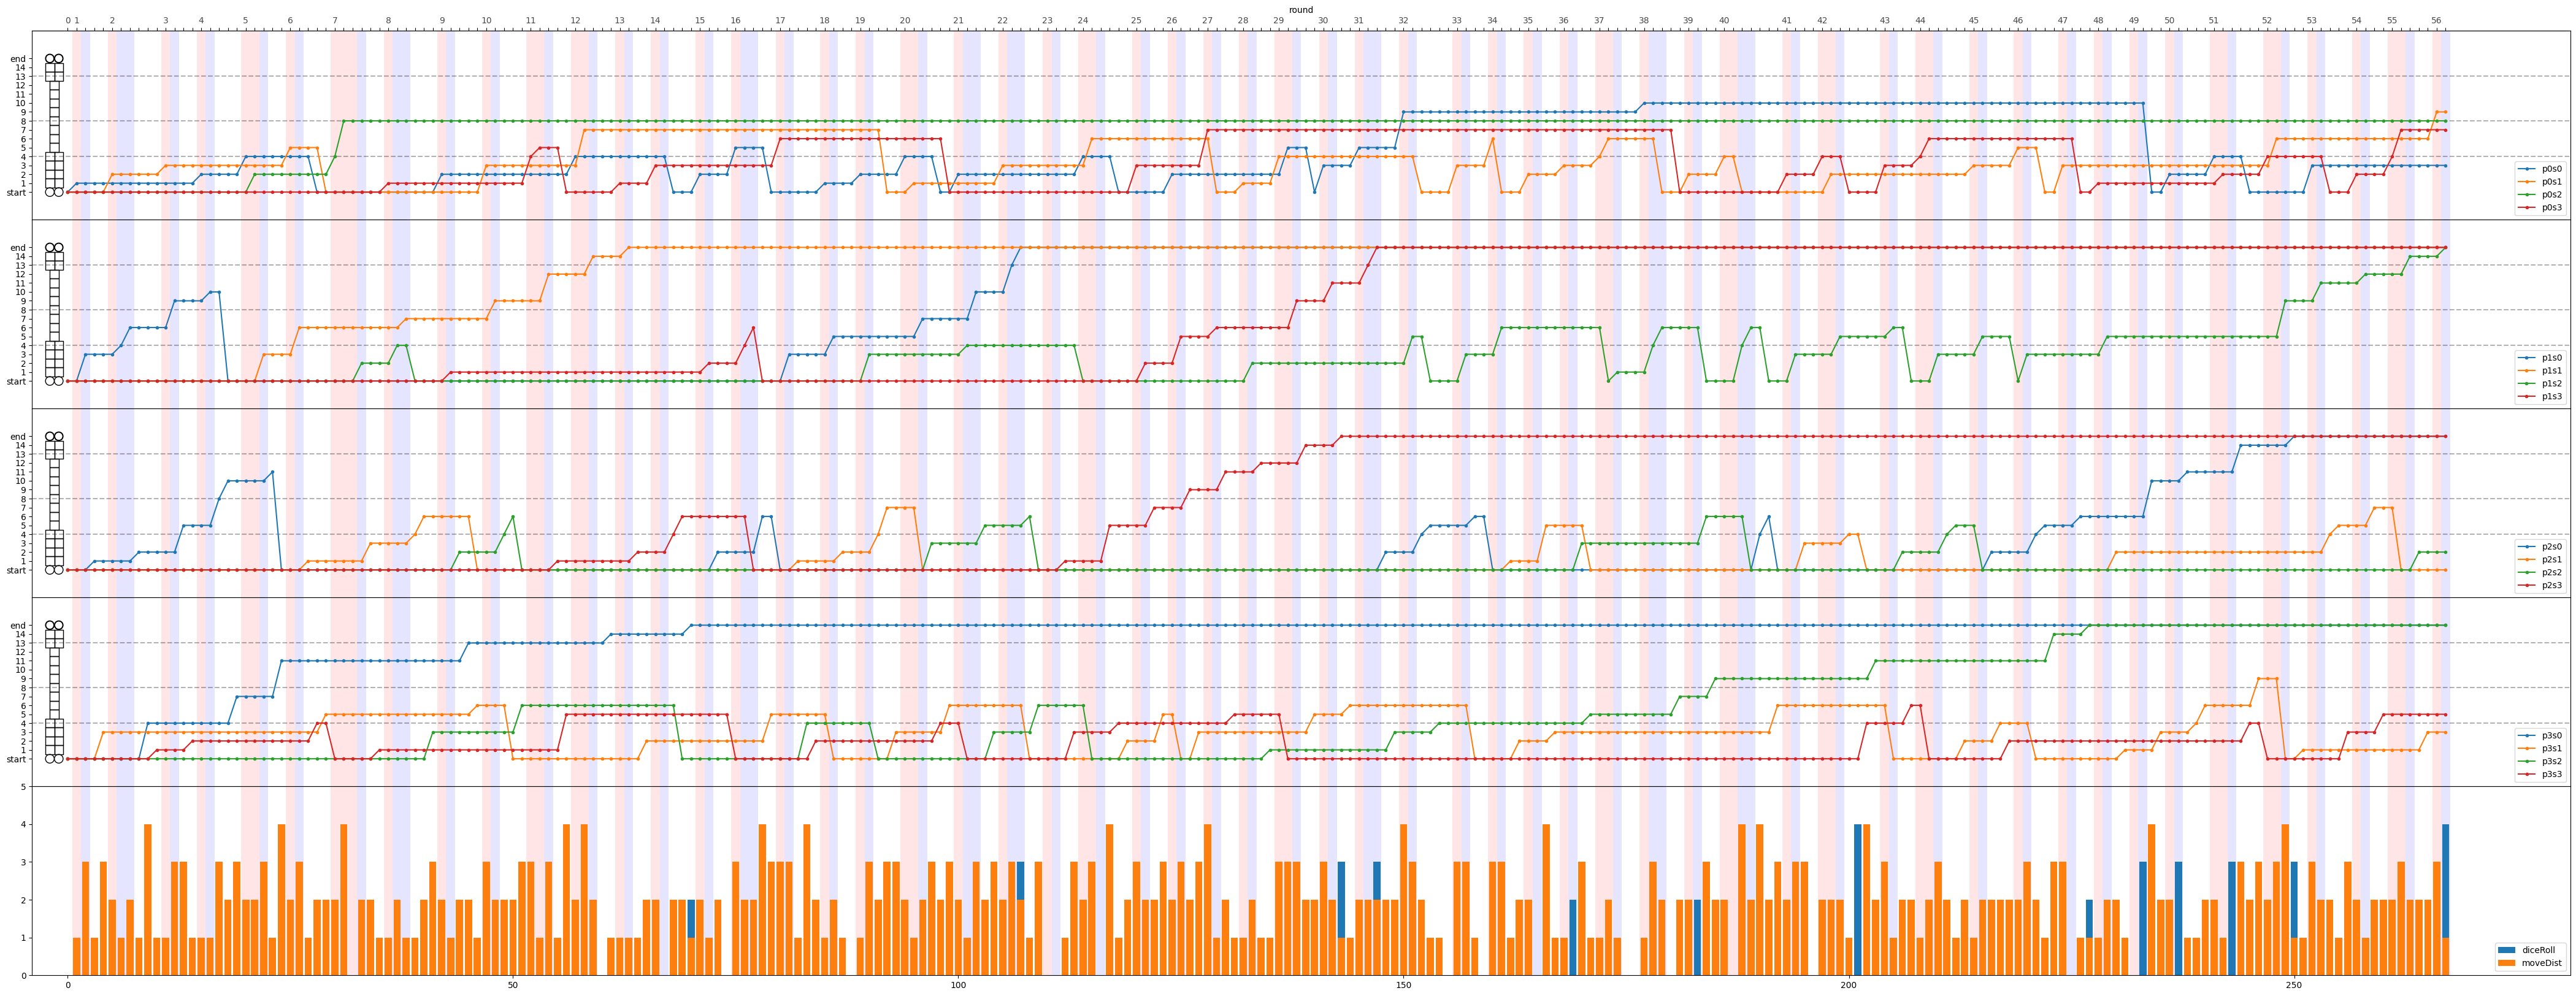

In [ ]:
currGame = h[interestingGames["max"]]

stepWidth = 0.2
stepLineOcc = 0.1

roundsLabels = [currGame["history"]["roundID"][i] if nR else ""  for i,nR in enumerate(currGame["history"]["newRound"])]

graphcount = len(currGame["history"]["stones"])+1
stepcount = np.max(currGame["history"]["globalStepID"])

fig, ax = plt.subplots(nrows=graphcount, sharex=True, figsize=[
                       stepWidth*stepcount, 4*graphcount])
fig.subplots_adjust(hspace=0)


# for i,p in enumerate(currGame["history"]["stones"]):
    # ax[i].set_title(p)
    # ax[i].set_yticklabels()

# ax[-1].set_title("DiceRolls/MoveDist")

for a in ax[:-1]:
    gb_coll = gb.getGameboard(4, 8, 2, xoff=2)
    a.add_collection(gb_coll)
    a.set_yticks(range(0, 16), ["start"]+list(range(1, 15))+["end"])
    for drf in gs.getDoubleRollFields():
        a.axhline(drf, color=(0, 0, 0, 0.3),  ls='--')

for a in ax:
    for i, ap in enumerate(currGame["history"]["activePlayer"]):
        if ap == "p0":
            facecolor = '#ff0000'
        elif ap == "p1":
            facecolor = '#0000ff'
        else:
           continue
        a.axvspan(i-0.5, i+0.5, facecolor=facecolor, alpha=stepLineOcc)

ax[0].set_xlabel('step')
secax = ax[0].secondary_xaxis('top')
secax.set_xlabel('round')
secax.set_xticks(currGame["history"]["globalStepID"], roundsLabels,
                    color=(0.1, 0.1, 0.1, 0.8))



# norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
for i, p in enumerate(currGame["history"]["stones"]):
    playerStones = currGame["history"]["stones"][p]
    for s in playerStones:
        ax[i].plot(currGame["history"]["globalStepID"],
                 playerStones[s], marker='.', label=s)
    
ax[-1].bar(currGame["history"]["globalStepID"],
           currGame["history"]["diceRoll"], label="diceRoll")
ax[-1].bar(currGame["history"]["globalStepID"],
           currGame["history"]["moveDist"], label="moveDist")


for a in ax[:-1]:
    a.axis('equal')
for a in ax:
    # a.grid("y")
    a.legend(loc="lower right")
    a.set_xbound(-4)

ax[-1].set_ybound(0,5)
ax[-1].set_ylim(0,5)

divider = make_axes_locatable(ax[-1])
# axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=ax[-1])
# axHisty.hist(currGame["history"]["diceRoll"],orientation='horizontal')
# axHisty.hist(currGame["history"]["moveDist"],orientation='horizontal')
# currGame["history"]["roundID"]
# fig.tight_layout()


In [ ]:
currGame["history"]["activePlayer"]
currGame["history"]["newRound"]
currGame["history"]["roundID"]
[x["winner"].getName() for x in h].count("p0")


0

In [ ]:
game_length = 14

current_pos = -1

step_count = 0



while current_pos <= game_length:
       step_count += 1
       for i in range(current_pos):
              print(" ", end='')
       print("┠", end='')
       move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
       for i in range(move_dist-1):
              print("─", end='')
       print("┨ "+ str(move_dist) )

       current_pos+= move_dist

       print("┠╂", end='')
       for i in range(game_length-1):
              print("┬", end='')
       print("╂┨ "+str(current_pos))
       for i in range(current_pos):
              print(" ", end='')
       print("┃")

 


┠┨ 0
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ -1
┃
┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 0
┃
┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 2
  ┃
  ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 3
   ┃
   ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 5
     ┃
     ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 7
       ┃
       ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 9
         ┃
         ┠┨ 0
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 9
         ┃
         ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 11
           ┃
           ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 12
            ┃
            ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 14
              ┃
              ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 16
                ┃
